In [231]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [232]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
region = pd.read_csv("regions.csv")

In [233]:
train.shape, test.shape, region.shape

((18403, 9), (7886, 8), (9, 2))

In [273]:
train.head()

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961


In [235]:
test.head()

,Id,region,date,O3,PM10,PM25,NO2,T2M
0,18404,E12000006,2012-05-28,75.980,20.876,19.123,9.713,290.787
1,18405,E12000006,2012-05-29,73.084,21.660,17.794,8.417,288.474
2,18406,E12000006,2012-05-30,59.350,21.925,17.699,10.878,289.889
3,18407,E12000006,2012-05-31,45.991,14.549,11.386,10.302,287.815
4,18408,E12000006,2012-06-01,52.210,11.208,9.545,8.598,287.627


In [236]:
region.head()

,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands


In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18403 entries, 0 to 18402
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              18403 non-null  int64  
 1   region          18403 non-null  object 
 2   date            18403 non-null  object 
 3   mortality_rate  18403 non-null  float64
 4   O3              18394 non-null  float64
 5   PM10            18394 non-null  float64
 6   PM25            15127 non-null  float64
 7   NO2             11833 non-null  float64
 8   T2M             18403 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [241]:
region

,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000006,East of England
6,E12000007,London
7,E12000008,South East
8,E12000009,South West


In [274]:
train1 = train.merge(region, left_on='region', right_on='Code')
test1 = test.merge(region, left_on='region', right_on='Code')

In [275]:
train1.groupby("region")["Region"].unique()

region
E12000001                  [North East]
E12000002                  [North West]
E12000003    [Yorkshire and The Humber]
E12000004               [East Midlands]
E12000005               [West Midlands]
E12000006             [East of England]
E12000007                      [London]
E12000008                  [South East]
E12000009                  [South West]
Name: Region, dtype: object

In [276]:
train1.head()

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M,Code,Region
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138,E12000001,North East
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745,E12000001,North East
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523,E12000001,North East
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421,E12000001,North East
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961,E12000001,North East


In [277]:
train1.drop("region", axis=1, inplace=True)
test1.drop("region", axis=1, inplace=True)

#### Converting date to datetime format

In [278]:
train1["date"] = pd.to_datetime(train1['date'])
test1["date"] = pd.to_datetime(test1['date'])

#### Missing value check

In [271]:
train1.isna().sum()

Id                   0
date                 0
mortality_rate       0
O3                   9
PM10                 9
PM25              3276
NO2               6570
T2M                  0
Code                 0
Region               0
dtype: int64

In [272]:
test1.isna().sum()

Id        0
date      0
O3        0
PM10      0
PM25      0
NO2       0
T2M       0
Code      0
Region    0
dtype: int64

## Univariate analysis ##

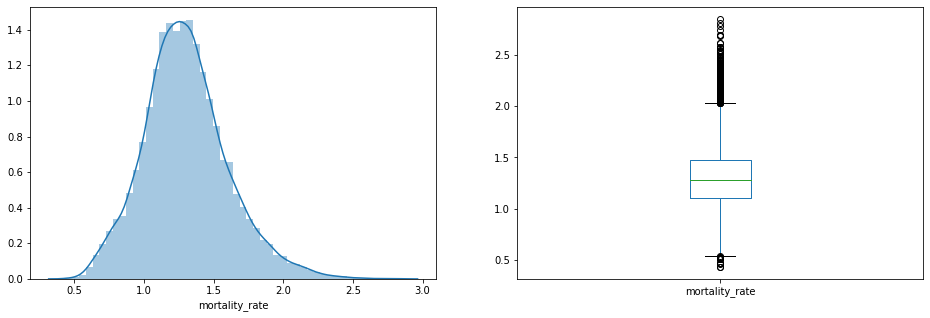

In [246]:
# Visualizing mortality_rate
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['mortality_rate']);

plt.subplot(122)
train['mortality_rate'].plot.box(figsize=(16,5))

plt.show()


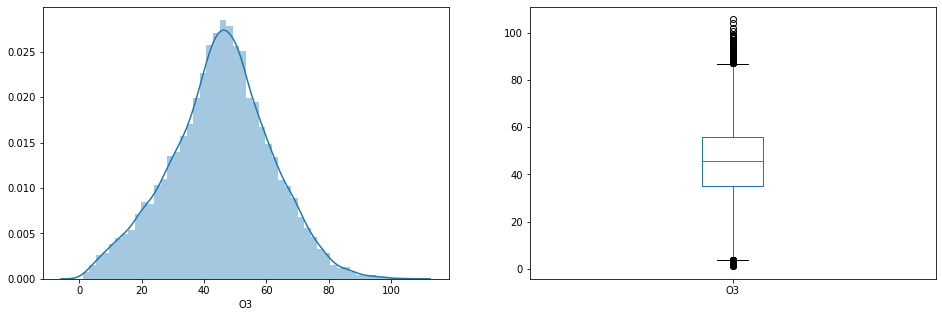

In [247]:
# Visualizing O3
# plt.figure(1)
plt.subplot(121)
O3_1 = train['O3'].dropna()
sns.distplot(O3_1);

plt.subplot(122)
O3_1.plot.box(figsize=(16,5))

plt.show()


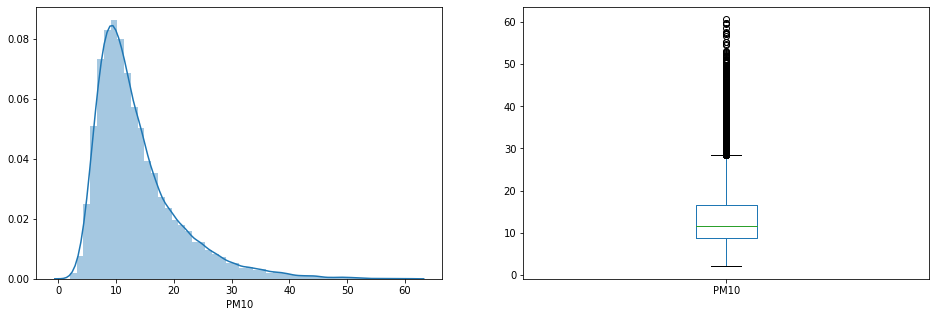

In [248]:
# Visualizing PM10
# plt.figure(1)
plt.subplot(121)
PM10_1 = train['PM10'].dropna()
sns.distplot(PM10_1);

plt.subplot(122)
PM10_1.plot.box(figsize=(16,5))

plt.show()


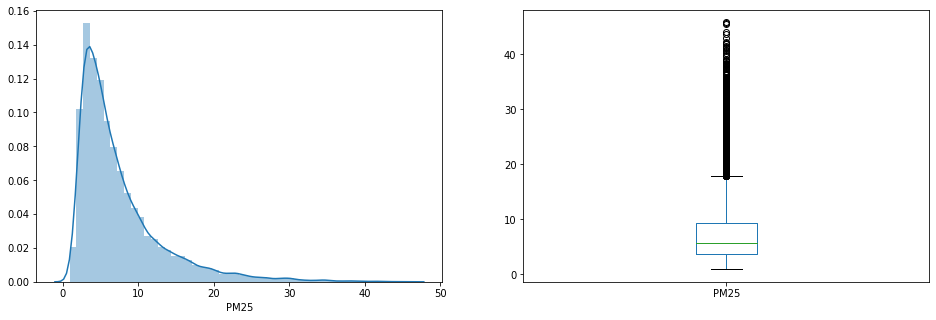

In [249]:
# Visualizing PM25
# plt.figure(1)
plt.subplot(121)
PM25_1 = train['PM25'].dropna()
sns.distplot(PM25_1);

plt.subplot(122)
PM25_1.plot.box(figsize=(16,5))

plt.show()


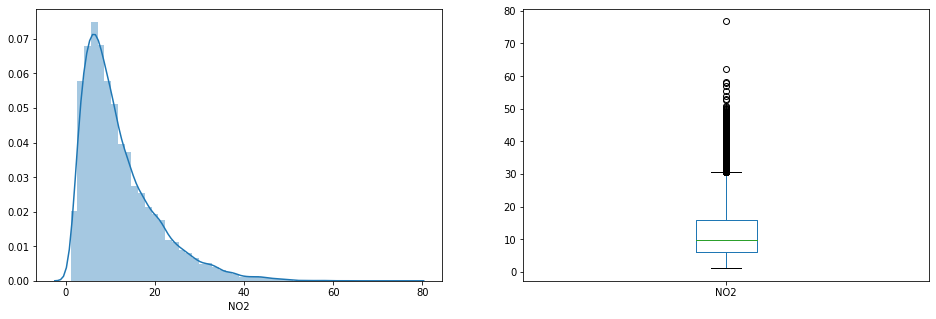

In [250]:
# Visualizing NO2
# plt.figure(1)
plt.subplot(121)
NO2_1 = train['NO2'].dropna()
sns.distplot(NO2_1);

plt.subplot(122)
NO2_1.plot.box(figsize=(16,5))

plt.show()


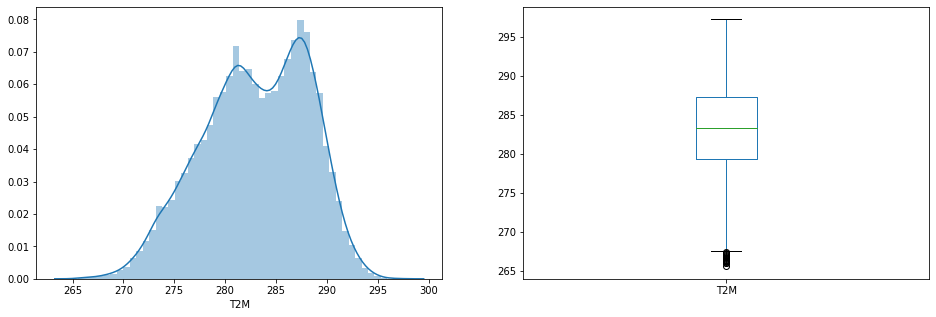

In [251]:
# Visualizing T2M
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['T2M']);

plt.subplot(122)
train['T2M'].plot.box(figsize=(16,5))

plt.show()


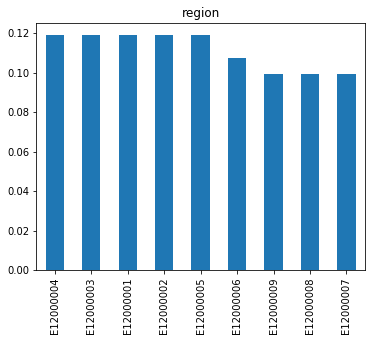

In [252]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'region')

# Bivariate analysis - Region Wise

### variation with date - time series plot ##

### For region 1 - North East

In [78]:
train_r1 = train1[train1["Region"]=="North East"]
fig1 = px.line(train_r1, x='date', y='mortality_rate')
fig1.show()

In [26]:
fig2 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1['mortality_rate'])])
#fig2.show()

fig2.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [32]:
fig3 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["O3"])])
#fig2.show()

fig3.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [33]:
fig2 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["PM10"])])
#fig2.show()

fig2.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [34]:
fig4 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["PM25"])])
#fig2.show()

fig4.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [35]:
fig5 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["NO2"])])
#fig2.show()

fig5.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

### scatter plot of PM25 with other varibles ###

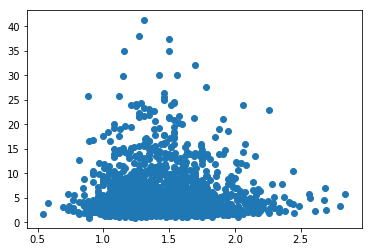

In [140]:
plt.scatter(x=train_r1['mortality_rate'], y=train_r1["PM25"])

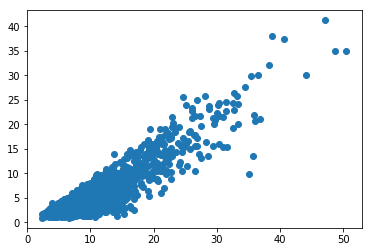

In [141]:
plt.scatter(x=train_r1['PM10'], y=train_r1["PM25"])

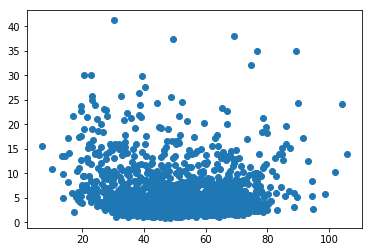

In [142]:
plt.scatter(x=train_r1['O3'], y=train_r1["PM25"])

In [143]:
train.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

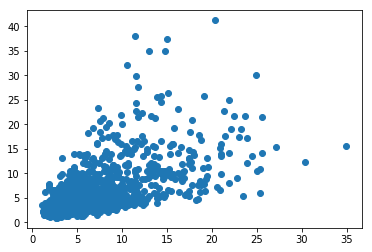

In [144]:
plt.scatter(x=train_r1['NO2'], y=train_r1["PM25"])

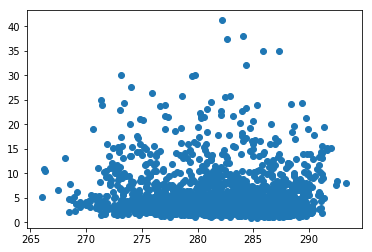

In [145]:
plt.scatter(x=train_r1['T2M'], y=train_r1["PM25"])

### scatter plot of NO2 with other varibales ###

In [146]:
train.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

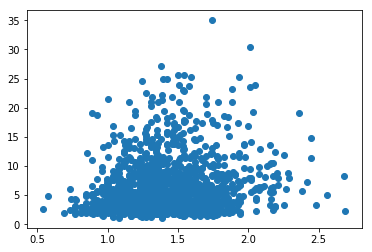

In [147]:
plt.scatter(x=train_r1['mortality_rate'], y=train_r1["NO2"])

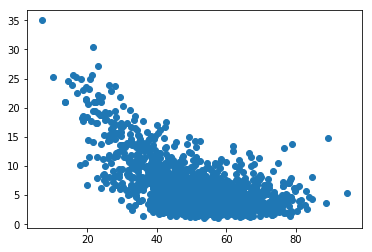

In [148]:
plt.scatter(x=train_r1['O3'], y=train_r1["NO2"])

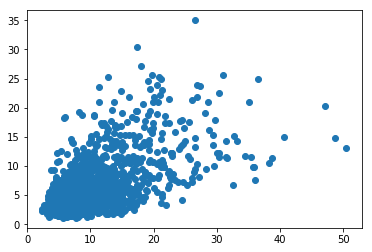

In [149]:
plt.scatter(x=train_r1['PM10'], y=train_r1["NO2"])

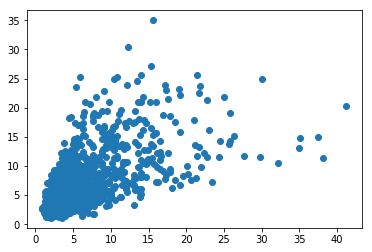

In [150]:
plt.scatter(x=train_r1['PM25'], y=train_r1["NO2"])

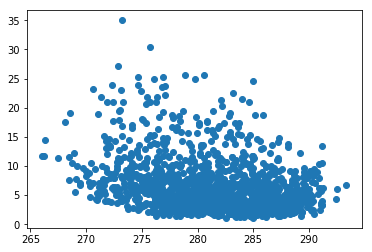

In [151]:
plt.scatter(x=train_r1['T2M'], y=train_r1["NO2"])

## Missing value imputation using MICE 

#### For Region1 - North East

In [27]:
train_r1.head()

,Id,date,mortality_rate,O3,PM10,PM25,NO2,T2M,Code,Region
0,1,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138,E12000001,North East
1,2,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745,E12000001,North East
2,3,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523,E12000001,North East
3,4,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421,E12000001,North East
4,5,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961,E12000001,North East


In [28]:
train_r1.isna().sum()

Id                  0
date                0
mortality_rate      0
O3                  1
PM10                1
PM25              364
NO2               730
T2M                 0
Code                0
Region              0
dtype: int64

In [29]:
from impyute.imputation.cs import mice

# start the MICE training
train_r1_imp=mice(train_r1.drop(["Id", "date", "Code", "Region"], axis = 1).values)

In [30]:
train_r1_imp = pd.DataFrame(train_r1_imp, columns = ["mortality_rate", "O3", "PM10", "PM25","NO2","T2M"])

In [213]:
train_r1_imp.isna().sum()

mortality_rate    0
O3                0
PM10              0
PM25              0
NO2               0
T2M               0
dtype: int64

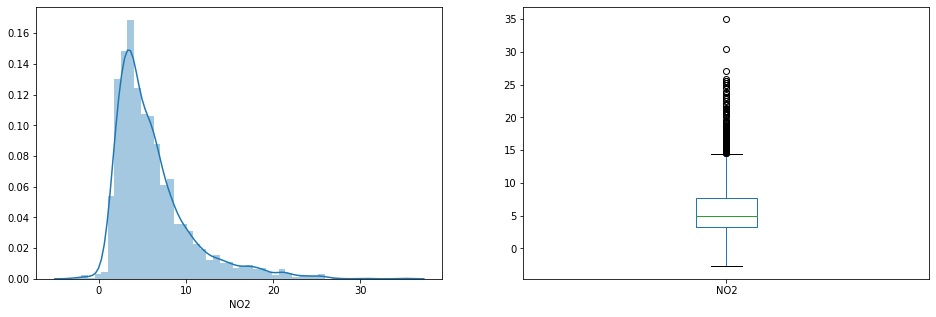

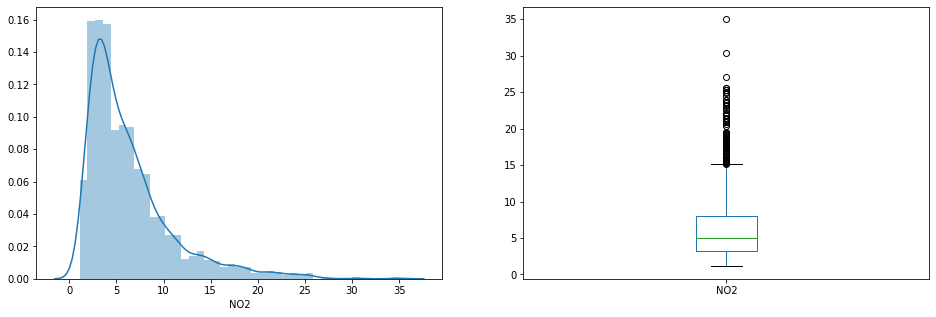

In [31]:
# Visualizing NO2
# plt.figure(1)
plt.subplot(121)
NO2_1 = train_r1_imp['NO2'].dropna()
sns.distplot(NO2_1);

plt.subplot(122)
NO2_1.plot.box(figsize=(16,5))

plt.show()


plt.subplot(121)
NO2_1 = train_r1['NO2'].dropna()
sns.distplot(NO2_1);

plt.subplot(122)
NO2_1.plot.box(figsize=(16,5))

plt.show()

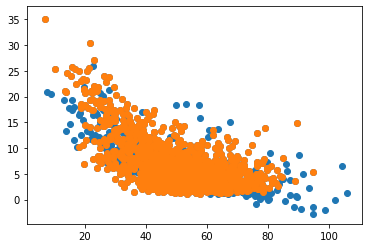

In [32]:
plt.scatter(x=train_r1_imp['O3'], y=train_r1_imp["NO2"])
plt.scatter(x=train_r1['O3'], y=train_r1["NO2"])

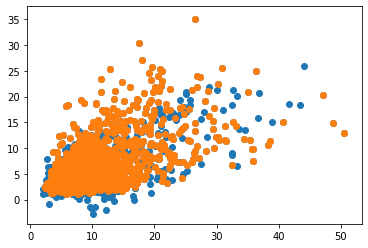

In [33]:
plt.scatter(x=train_r1_imp['PM10'], y=train_r1_imp["NO2"])
plt.scatter(x=train_r1['PM10'], y=train_r1["NO2"])

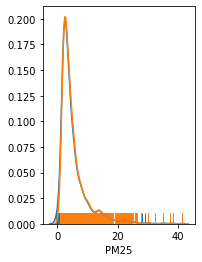

In [35]:
# Visualizing NO2
# plt.figure(1)
plt.subplot(121)
NO2_1_imp = train_r1_imp['PM25'].dropna()
NO2_1 = train_r1['PM25'].dropna()
#sns.distplot(NO2_1_imp)
#sns.distplot(NO2_1)

sns.distplot(NO2_1_imp, hist=False, rug=True)
sns.distplot(NO2_1, hist=False, rug=True)


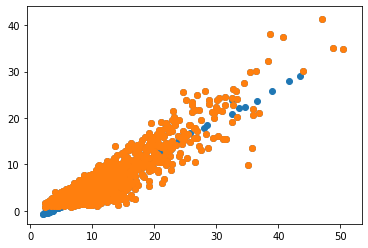

In [36]:
plt.scatter(x=train_r1_imp['PM10'], y=train_r1_imp["PM25"])
plt.scatter(x=train_r1['PM10'], y=train_r1["PM25"])

In [37]:
train_r1_imp['PM25'].describe(), train_r1['PM25'].describe()

(count    2191.000000
 mean        5.205221
 std         4.763198
 min        -0.633236
 25%         2.333000
 50%         3.632598
 75%         6.158707
 max        41.255000
 Name: PM25, dtype: float64,
 count    1827.000000
 mean        5.368816
 std         4.773007
 min         0.904000
 25%         2.451500
 50%         3.802000
 75%         6.269000
 max        41.255000
 Name: PM25, dtype: float64)

In [38]:
## changing negative values to min value
train_r1_imp['PM25'] = np.where(train_r1_imp['PM25']<=0, 0.904000, train_r1_imp['PM25'] )

In [39]:
train_r1_imp['NO2'].describe(), train_r1['NO2'].describe()

(count    2191.000000
 mean        6.164380
 std         4.375788
 min        -2.754285
 25%         3.228438
 50%         4.988000
 75%         7.734662
 max        34.990000
 Name: NO2, dtype: float64,
 count    1461.000000
 mean        6.353291
 std         4.572821
 min         1.104000
 25%         3.172000
 50%         4.988000
 75%         7.971000
 max        34.990000
 Name: NO2, dtype: float64)

In [40]:
## changing negative values to min value
train_r1_imp['NO2'] = np.where(train_r1_imp['NO2']<=0, 1.104000, train_r1_imp['NO2'] )

#### Since we are getting good enough results region wise we can impute PM25 and NO2 on the basis of regions

### Region wise imputation

In [173]:
regions = list(region["Region"].values)
train_imp = pd.DataFrame()

for reg in regions:
    
    train_r = train1[train1["Region"] == reg].reset_index(drop=True)
    train_r_imp = mice(train_r.drop(["Id", "date", "Code", "Region", "region"], axis = 1).values)
    train_r_imp = pd.DataFrame(train_r_imp, columns = ["mortality_rate", "O3", "PM10", "PM25","NO2","T2M"])
    
    ## changing negative values to min value
    train_r_imp['PM25'] = np.where(train_r_imp['PM25']<=0, min(train_r['PM25']), train_r_imp['PM25'] )
    
    ## changing negative values to min value
    train_r_imp['NO2'] = np.where(train_r_imp['NO2']<=0, min(train_r['NO2']), train_r_imp['NO2'] )
    
    print("\n\n")
    print("train_r = before", train_r.isna().sum())
    
    train_r['PM25'] = train_r_imp['PM25']
    train_r['NO2'] = train_r_imp['NO2']
    train_r['O3'] = train_r_imp['O3']
    train_r['PM10'] = train_r_imp['PM10']
    
    print("train_r_imp = \n", train_r_imp.isna().sum())
    print("train_r = \n", train_r.isna().sum())
    print("----------------------------------------")
    
    train_imp = train_imp.append(train_r)
    
print("train_imp = ", train_imp.isna().sum())
    
    




train_r = before Id                  0
region              0
date                0
mortality_rate      0
O3                  1
PM10                1
PM25              364
NO2               730
T2M                 0
Code                0
Region              0
dtype: int64
train_r_imp = 
 mortality_rate     0
O3                 0
PM10               0
PM25              14
NO2                8
T2M                0
dtype: int64
train_r = 
 Id                 0
region             0
date               0
mortality_rate     0
O3                 0
PM10               0
PM25              14
NO2                8
T2M                0
Code               0
Region             0
dtype: int64
----------------------------------------



train_r = before Id                  0
region              0
date                0
mortality_rate      0
O3                  1
PM10                1
PM25              364
NO2               730
T2M                 0
Code                0
Region              0
dtype: int6

In [214]:
pd.set_option('display.max_rows', None)
#train_imp
                                    

In [221]:
temp_r_imp = mice(train_imp.drop(["Id", "date", "Code", "Region", "region"], axis = 1).values)
temp_r_imp = pd.DataFrame(temp_r_imp, columns = ["mortality_rate", "O3", "PM10", "PM25","NO2","T2M"])

train_r_imp_full = train_imp.copy()
train_r_imp_full["NO2"] = temp_r_imp["NO2"]
train_r_imp_full["PM25"] = temp_r_imp["PM25"]
train_r_imp_full["O3"] = temp_r_imp["O3"]
train_r_imp_full["PM10"] = temp_r_imp["PM10"]

train_r_imp_full.isna().sum()  #### FINAL DATAFRAME WITH IMPUTED VALUES REGION WISE

Id                0
region            0
date              0
mortality_rate    0
O3                0
PM10              0
PM25              0
NO2               0
T2M               0
Code              0
Region            0
dtype: int64

In [222]:
train_r_imp_full.shape, train1.shape

((18403, 11), (18403, 10))

In [223]:
train_r_imp_full.head(50)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M,Code,Region
0,1,E12000001,2007-01-02,2.264,42.358,9.021,3.985224,7.768462,278.138,E12000001,North East
1,2,E12000001,2007-01-03,2.030,49.506,5.256,1.321535,4.416754,281.745,E12000001,North East
2,3,E12000001,2007-01-04,1.874,51.101,4.946,1.231309,4.261085,280.523,E12000001,North East
3,4,E12000001,2007-01-05,2.069,47.478,6.823,2.462306,5.622606,280.421,E12000001,North East
4,5,E12000001,2007-01-06,1.913,45.226,7.532,3.136436,6.550947,278.961,E12000001,North East
5,6,E12000001,2007-01-07,1.756,53.226,5.607,1.754363,3.989717,281.504,E12000001,North East
6,7,E12000001,2007-01-08,1.756,48.177,4.674,1.167923,4.824377,279.519,E12000001,North East
7,8,E12000001,2007-01-09,2.147,56.917,5.979,1.697248,3.458943,281.866,E12000001,North East
8,9,E12000001,2007-01-10,2.186,45.757,3.433,0.012028,5.005039,278.044,E12000001,North East
9,10,E12000001,2007-01-11,1.249,56.388,6.159,2.528594,3.905907,280.358,E12000001,North East


In [224]:
train_r_imp_full['NO2'].describe(), train1['NO2'].describe()
train_r_imp_full['PM25'].describe(), train1['PM25'].describe()

(count    18403.000000
 mean         5.161193
 std          4.759401
 min         -1.010948
 25%          2.272000
 50%          3.572000
 75%          6.127000
 max         41.255000
 Name: PM25, dtype: float64,
 count    15127.000000
 mean         7.498714
 std          5.758357
 min          0.904000
 25%          3.624000
 50%          5.636000
 75%          9.326500
 max         45.846000
 Name: PM25, dtype: float64)

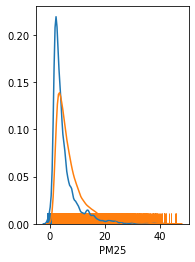

In [225]:
plt.subplot(121)
NO2_1= train1['PM25'].dropna()
NO2_1_imp  = train_r_imp_full['PM25'].dropna()
#sns.distplot(NO2_1_imp)
#sns.distplot(NO2_1)

sns.distplot(NO2_1_imp, hist=False, rug=True)
sns.distplot(NO2_1, hist=False, rug=True)

Region wise imputation is fine but at an overall level it does not suits well..

### Impution on full data - MICE

In [226]:
# start the MICE training
temp_imp = mice(train1.drop(["Id", "date", "Code", "Region"], axis = 1).values)
temp_imp = pd.DataFrame(temp_imp, columns = ["mortality_rate", "O3", "PM10", "PM25","NO2","T2M"])

train_full_imp = train1.copy()
train_full_imp["NO2"] = temp_imp["NO2"]
train_full_imp["PM25"] = temp_imp["PM25"]
train_full_imp["O3"] = temp_imp["O3"]
train_full_imp["PM10"] = temp_imp["PM10"]

In [228]:
train_full_imp.isna().sum() ### FINAL DATAFRAME WITH IMPUTATION ON FULL DATA

Id                0
date              0
mortality_rate    0
O3                0
PM10              0
PM25              0
NO2               0
T2M               0
Code              0
Region            0
dtype: int64

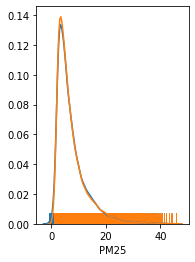

In [229]:
plt.subplot(121)
NO2_1= train1['PM25'].dropna()
NO2_1_imp  = train_full_imp['PM25'].dropna()
#sns.distplot(NO2_1_imp)
#sns.distplot(NO2_1)

sns.distplot(NO2_1_imp, hist=False, rug=True)
sns.distplot(NO2_1, hist=False, rug=True)